In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
 from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Karnataka1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,20,0,0,0,18,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,18,0,0,0,0,0,0,0
131397,2014,12,31,21,0,19,0,0,0,18,0,0,0,0,0,0,0
131398,2014,12,31,22,0,19,0,0,0,18,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110,2000-01-01 02:00:00
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343,2000-01-01 03:00:00
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554,2000-01-01 04:00:00
5,2000,1,1,5,0,23,153,821,718,14,153,129,821,859,0,718,721,2000-01-01 05:00:00
6,2000,1,1,6,0,24,162,856,822,14,162,160,856,861,0,822,825,2000-01-01 06:00:00
7,2000,1,1,7,0,25,164,863,852,14,258,258,677,677,0,798,798,2000-01-01 07:00:00
8,2000,1,1,8,0,25,160,847,804,14,192,192,769,769,0,777,777,2000-01-01 08:00:00
9,2000,1,1,9,0,25,150,803,685,15,150,147,803,819,0,685,693,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2014-12-27,217.0
2014-12-28,161.8
2014-12-29,183.2


In [8]:
X

,Date,GHI
0,2000-01-01 08:00:00,777
1,2000-01-01 09:00:00,685
2,2000-01-01 10:00:00,505
3,2000-01-01 11:00:00,286
4,2000-01-01 12:00:00,58
...,...,...
54745,2014-12-31 13:00:00,0
54746,2014-12-31 14:00:00,0
54747,2014-12-31 15:00:00,0
54748,2014-12-31 16:00:00,0


In [9]:
y[:4380]

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2011-12-27,175.3
2011-12-28,224.1
2011-12-29,216.1


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
type(y)

pandas.core.frame.DataFrame

In [12]:
X_T=[]
X=X.loc[:,'GHI']
X=X.values

for i in range(0,54750,10):
  X_add = X[i:i+10]
  #print(i,j)
  X_T.append(X_add)
  
X_T=np.asarray(X_T)
X_T.shape

(5475, 10)

In [13]:
X_T

array([[777, 685, 505, ...,   0,   0,   0],
       [805, 687, 508, ...,   0,   0,   0],
       [756, 683, 491, ...,   0,   0,   0],
       ...,
       [701, 611, 431, ...,   0,   0,   0],
       [749, 632, 462, ...,   0,   0,   0],
       [769, 652, 428, ...,   0,   0,   0]])

In [14]:
Y_T=y.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(5475,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(10,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
  
# fit model
model.fit(X_T[:4380], Y_T[:4380], epochs=2000, verbose=0)


In [16]:
# demonstrate prediction
yhat=[]


for i in range(4380,5475):
  x_input = X_T[i]
  x_input = x_input.reshape(1,10,1)
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[224.74455]]
[[235.5667]]
[[236.27132]]
[[237.06506]]
[[238.76904]]
[[223.48154]]
[[243.4776]]
[[250.88435]]
[[247.18663]]
[[212.40125]]
[[225.20135]]
[[209.68497]]
[[220.19524]]
[[253.89711]]
[[262.10538]]
[[258.6015]]
[[263.2137]]
[[264.0167]]
[[262.02246]]
[[257.12485]]
[[260.4169]]
[[267.22394]]
[[264.91626]]
[[269.0323]]
[[272.8386]]
[[272.6515]]
[[277.54764]]
[[235.35753]]
[[226.91579]]
[[277.44434]]
[[280.36917]]
[[265.47348]]
[[271.8438]]
[[273.14816]]
[[276.65387]]
[[276.76074]]
[[279.06485]]
[[258.32257]]
[[255.70795]]
[[269.28644]]
[[278.59515]]
[[221.04301]]
[[275.98938]]
[[281.6978]]
[[288.79553]]
[[252.18318]]
[[288.60974]]
[[287.31293]]
[[294.82263]]
[[297.02475]]
[[296.1189]]
[[298.72433]]
[[298.92545]]
[[290.28934]]
[[288.86176]]
[[302.52145]]
[[303.122]]
[[306.93204]]
[[308.537]]
[[292.60403]]
[[288.20398]]
[[287.60138]]
[[291.103]]
[[293.72598]]
[[291.94028]]
[[292.35617]]
[[299.02832]]
[[292.89432]]
[[301.01352]]
[[297.9192]]
[[296.75986]]
[[224.92343]]
[[243.38141

[array([[224.74455]], dtype=float32),
 array([[235.5667]], dtype=float32),
 array([[236.27132]], dtype=float32),
 array([[237.06506]], dtype=float32),
 array([[238.76904]], dtype=float32),
 array([[223.48154]], dtype=float32),
 array([[243.4776]], dtype=float32),
 array([[250.88435]], dtype=float32),
 array([[247.18663]], dtype=float32),
 array([[212.40125]], dtype=float32),
 array([[225.20135]], dtype=float32),
 array([[209.68497]], dtype=float32),
 array([[220.19524]], dtype=float32),
 array([[253.89711]], dtype=float32),
 array([[262.10538]], dtype=float32),
 array([[258.6015]], dtype=float32),
 array([[263.2137]], dtype=float32),
 array([[264.0167]], dtype=float32),
 array([[262.02246]], dtype=float32),
 array([[257.12485]], dtype=float32),
 array([[260.4169]], dtype=float32),
 array([[267.22394]], dtype=float32),
 array([[264.91626]], dtype=float32),
 array([[269.0323]], dtype=float32),
 array([[272.8386]], dtype=float32),
 array([[272.6515]], dtype=float32),
 array([[277.54764]],

In [17]:
len(yhat)

1095

In [18]:
y[4380:].index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

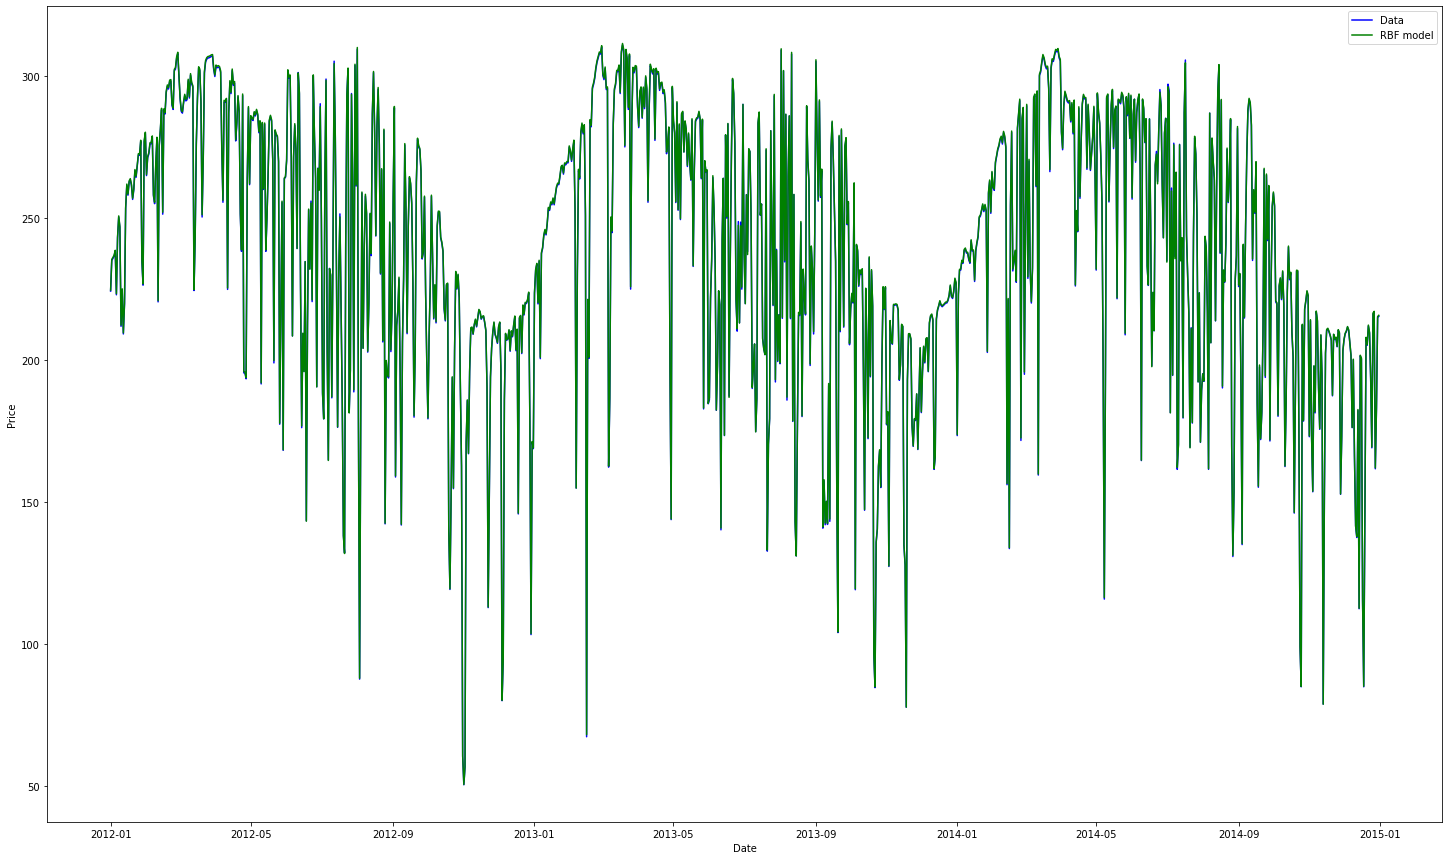

In [19]:
plt.figure(figsize = (25,15))
plt.plot(y[4380:].index, y[4380:], color= 'blue', label= 'Data')
plt.plot(y[4380:].index,np.asarray(yhat).reshape(1095,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

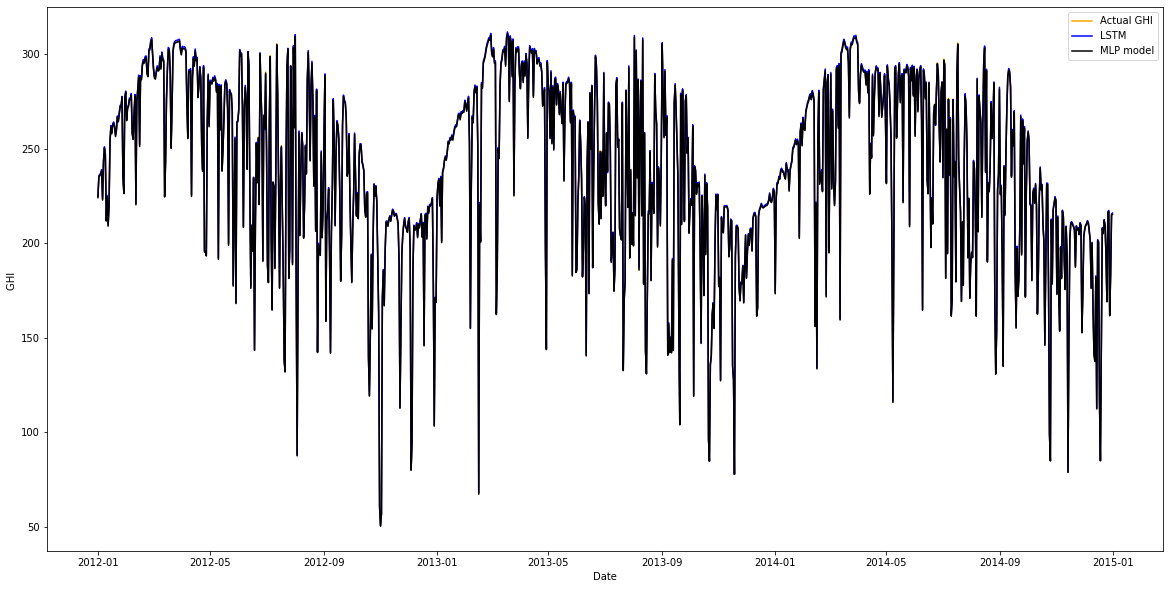

In [23]:
#df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/SARIMAdaily.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Karnataka1/MLPdaily.csv')

plt.figure(figsize = (20,10))
plt.plot(y[4380:].index, y[4380:], color= 'orange', label= 'Actual GHI')
plt.plot(y[4380:].index, np.asarray(yhat).reshape(1095,) , color= 'blue', label= 'LSTM')
#plt.plot(y[4380:].index,df1['Prediction'] , color= 'green', label= 'SARIMA model') 
plt.plot(y[4380:].index, df2['GHI'], color= 'black', label= 'MLP model')
plt.xlabel('Date')
plt.ylabel('GHI ')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[4380:],np.asarray(yhat).reshape(1095,) ,squared=False)

0.4430394107827355

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y[4380:],np.asarray(yhat).reshape(1095,))

0.001690501019468123